In [40]:
def aug(np_img ,crop_img_row , crop_img_col , label):
    """
    np_img must 4D 
    np_img shape : n , row , col , color_ch
    
    """
    if len(np.shape(np_img))==3:
        #grey
        np_img =np.expand_dims(np_img , axis =4)
    n_img,img_row,img_col,color_ch=np.shape(np_img)
    
    n_ret_img = n_img*(img_row - crop_img_row) * (img_col - crop_img_col)*3
    ret_images = np.zeros([n_ret_img ,crop_img_row , crop_img_col,color_ch])
    len_label= np.shape(label)[1]
    ret_labels =  np.zeros([n_ret_img  ,len_label])
    #print "n_augmented image size : " , n_ret_img 
    #print "n classes :", len_label
    #copy label in factor by 2014
    count=0
    if len(np.shape(np_img))==2:
        np_img=np.reshape(np_img , newshape = [np.shape(np_img)[0] , img_row , img_col ,color_ch])
        print np.shape(np_img)
    for n  in range(0,n_img):
        for r in range(img_row - crop_img_row):
            for c in range(img_col - crop_img_col):
                cropped_img = np_img[n, r:crop_img_row +r , c:crop_img_col+c ,: ]
                ret_images[count*3,:,:,:]=cropped_img  
                ret_images[(count*3+1) , :,:,:] =np.fliplr(cropped_img)
                ret_images[(count*3+2) , :,:,:] =np.flipud(cropped_img)
                
                ret_labels[count*3 , : ] = label[n,:]
                ret_labels[count*3+1 , : ] = label[n,:]
                ret_labels[count*3+2 , : ] = label[n,:]

                count+=1
    return ret_images ,ret_labels

(100, 100)
(3888, 64, 64, 1)


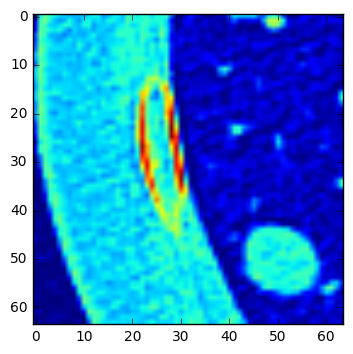

In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

folder_path = 'F:\\data\\ASAN\\ASAN_DATA\\Benign_crop_np\\'
name_path = '001_705_crop_target_up_712_np.npy'
img=np.load(folder_path + name_path)
print np.shape(img)
img=np.expand_dims(img , axis=0)
img_lab=np.zeros([1,2])
img_lab[0,0]=1
aug_imgs , aug_labs =aug(img ,64 ,64 , img_lab)
print np.shape(aug_imgs)
res_img = np.reshape(aug_imgs[0] , newshape = (64,64))
plt.imshow(res_img)


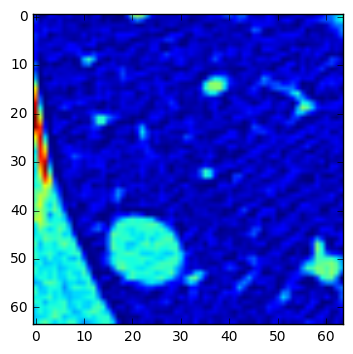

In [45]:
res_img = np.reshape(aug_imgs[300] , newshape = (64,64))
plt.imshow(res_img )



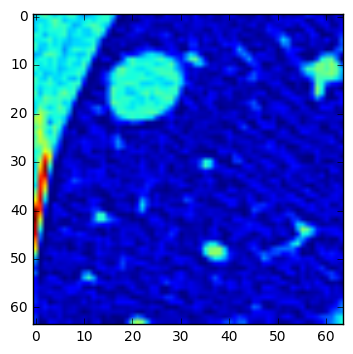

In [47]:
res_img = np.reshape(aug_imgs[302] , newshape = (64,64))
plt.imshow(res_img)

